In [1]:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


## 1.0 Introduction 

#### Loan default occurs  when an individual /group fails to honor their financial obligations to the lending authority 

#### In Kenya’s dynamic financial landscape , lenders and borrowers both face significant challenges . Some of the of the challenges faced by lenders  includes High default rate , political and economic instability ,corruption . Borrowers too face these challenges,limited access to credit ,high and flatulating interest rates, tough loan eligibility criteria , cultural  and social barriers especially on women .

#### We propose a Loan Default Prediction Model that use past data to evaluate the probability of an applicant defaulting on a loan. This prediction technology seeks to improve the decision-making processes of financial institutions by identifying high-risk applicants, therefore decreasing default rates and fostering financial stability.

## 2.0 Business Understanding
#### The main objective this Project is to develop a robust model to predict loan defaults, aiding in proactive risk management.

## 3.0 The Data 

#### We will use CRB data on https://open.africa/dataset/sensorsafrica-airquality-archive-sabaki-nairobi



In [2]:
application_data= pd.read_csv("ApplicationData.csv")
application_data.head()

,Application_ID,Application_Date,Loan_Approval_Status,Age_at_Application,Marital_Status,Gender,Own_Rent_Home,Occupation_Professional_Category,Type_of_Business_Industry_of_Employment,Employment_Status,Time_at_Current_Employment_(Months),Time_Employed_with_Previous_Employer_(Months),Number_of_Dependents,Loan_Purpose,Monthly_Income,Government_Employee
0,C302100001,2015-09-15,Approved,39.0,Unmarried,Female,Own,NaN,Other,Full-Time,6.0,NaN,2.0,Home Improvement,1500.59,NaN
1,C302100002,2015-08-31,Approved,29.0,Unmarried,Female,Family,NaN,NaN,Full-Time,25.0,NaN,0.0,Debt Consolidation,3769.36,NaN
2,C302100003,2015-09-21,Approved,24.0,Unmarried,Male,Family,NaN,NaN,Full-Time,7.0,NaN,0.0,Home Improvement,2197.10,NaN
3,C302100004,2015-11-14,Approved,54.0,Unmarried,Male,Rent,NaN,NaN,Full-Time,105.0,NaN,4.0,Debt Consolidation,1094.45,False
4,C302100005,2015-11-18,Approved,30.0,Unmarried,Female,Family,NaN,NaN,Full-Time,60.0,NaN,1.0,Vacation,3798.40,True


In [3]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Application_ID                                 9492 non-null   object 
 1   Application_Date                               9492 non-null   object 
 2   Loan_Approval_Status                           9354 non-null   object 
 3   Age_at_Application                             9471 non-null   float64
 4   Marital_Status                                 7712 non-null   object 
 5   Gender                                         9488 non-null   object 
 6   Own_Rent_Home                                  8188 non-null   object 
 7   Occupation_Professional_Category               9361 non-null   object 
 8   Type_of_Business_Industry_of_Employment        7210 non-null   object 
 9   Employment_Status                              9357 

In [4]:
application_data.isnull().sum()

Application_ID                                      0
Application_Date                                    0
Loan_Approval_Status                              138
Age_at_Application                                 21
Marital_Status                                   1780
Gender                                              4
Own_Rent_Home                                    1304
Occupation_Professional_Category                  131
Type_of_Business_Industry_of_Employment          2282
Employment_Status                                 135
Time_at_Current_Employment_(Months)               232
Time_Employed_with_Previous_Employer_(Months)    9194
Number_of_Dependents                             1814
Loan_Purpose                                       42
Monthly_Income                                      0
Government_Employee                               181
dtype: int64

In [5]:
#selecting the columns to use for our model 
df_appli_selected = application_data.drop(columns=["Government_Employee","Application_Date"])
df_appli_selected

,Application_ID,Loan_Approval_Status,Age_at_Application,Marital_Status,Gender,Own_Rent_Home,Occupation_Professional_Category,Type_of_Business_Industry_of_Employment,Employment_Status,Time_at_Current_Employment_(Months),Time_Employed_with_Previous_Employer_(Months),Number_of_Dependents,Loan_Purpose,Monthly_Income
0,C302100001,Approved,39.0,Unmarried,Female,Own,NaN,Other,Full-Time,6.0,NaN,2.0,Home Improvement,1500.59
1,C302100002,Approved,29.0,Unmarried,Female,Family,NaN,NaN,Full-Time,25.0,NaN,0.0,Debt Consolidation,3769.36
2,C302100003,Approved,24.0,Unmarried,Male,Family,NaN,NaN,Full-Time,7.0,NaN,0.0,Home Improvement,2197.10
3,C302100004,Approved,54.0,Unmarried,Male,Rent,NaN,NaN,Full-Time,105.0,NaN,4.0,Debt Consolidation,1094.45
4,C302100005,Approved,30.0,Unmarried,Female,Family,NaN,NaN,Full-Time,60.0,NaN,1.0,Vacation,3798.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487,C302109488,Approved,24.0,Unmarried,Female,Family,Professional,Unemployed,Full-Time,13.0,NaN,0.0,Other,3258.78
9488,C302109489,Approved,27.0,Unmarried,Female,Family,Service and Sales Worker,Unemployed,Contract,9.0,NaN,1.0,Debt Consolidation,3634.23
9489,C302109490,Approved,23.0,Married,Female,Own,Armed Forces Occupation,Retiree/Pensioner,Retired,9.0,NaN,0.0,Other,9126.52
9490,C302109491,Approved,22.0,Unmarried,Female,Family,Clerical Support Worker,Unemployed,Full-Time,13.0,NaN,0.0,Other,931.09


In [6]:
contract_data= pd.read_csv("ContractsData.csv")
contract_data.head()

,Contract_ID,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount
0,CONT100001,C302103426,1,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),24529.89
1,CONT100002,C302103426,2,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),35085.79
2,CONT100003,C302107460,1,Unsecured Personal Loan,202-1-08-31,2024-09-01,NaN,60 - Month(s),53564.88
3,CONT100004,C302107453,1,Unsecured Personal Loan,202-1-08-28,2023-08-28,NaN,48 - Month(s),29073.86
4,CONT100005,C302107447,1,Unsecured Personal Loan,202-1-08-27,2023-08-27,NaN,48 - Month(s),11723.33


In [7]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contract_ID                 9374 non-null   object 
 1   Application_ID              7598 non-null   object 
 2   Key                         9374 non-null   int64  
 3   Loan_Type                   9374 non-null   object 
 4   Contract_Start_Date         9374 non-null   object 
 5   Expected_Contract_End_Date  9374 non-null   object 
 6   Actual_Contract_End_Date    2593 non-null   object 
 7   Loan_Term                   9374 non-null   object 
 8   Total_Loan_Amount           9374 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 659.2+ KB


In [8]:
contract_data.isnull().sum()

Contract_ID                      0
Application_ID                1776
Key                              0
Loan_Type                        0
Contract_Start_Date              0
Expected_Contract_End_Date       0
Actual_Contract_End_Date      6781
Loan_Term                        0
Total_Loan_Amount                0
dtype: int64

## Cleaning Contract data 


In [9]:
df_contractsnapshot=pd.read_csv("ContractsSnapshotData.csv")
df_contractsnapshot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274371 entries, 0 to 274370
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Contract_ID              274371 non-null  object 
 1   Snapshot Date            274371 non-null  object 
 2   Outstanding Amount       274371 non-null  float64
 3   Due Amount               274371 non-null  float64
 4   Number of Days Past Due  79158 non-null   float64
 5   Contract Status          274371 non-null  object 
dtypes: float64(3), object(3)
memory usage: 12.6+ MB


In [10]:
df_contractsnapshot.isnull().sum()

Contract_ID                     0
Snapshot Date                   0
Outstanding Amount              0
Due Amount                      0
Number of Days Past Due    195213
Contract Status                 0
dtype: int64

In [11]:
df_crb=pd.read_csv("CRB Data.csv")
df_crb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    6750 non-null   object
 1   Application_Date  6750 non-null   object
 2   CRB Score         6750 non-null   int64 
 3   CRB Grade         6750 non-null   object
dtypes: int64(1), object(3)
memory usage: 211.1+ KB


In [12]:
df_crb.isnull().sum()

Application_ID      0
Application_Date    0
CRB Score           0
CRB Grade           0
dtype: int64

In [13]:
crb_selected=df_crb.drop(columns=["Application_Date"])
crb_selected

,Application_ID,CRB Score,CRB Grade
0,C302102137,593,D
1,C302106175,625,C
2,C302106175,616,C
3,C302103572,629,C
4,C302100598,685,A
...,...,...,...
6745,C302103644,518,E
6746,C302106169,627,C
6747,C302105619,645,C
6748,C302108238,641,C


In [14]:
df_accounts=pd.read_csv("Current and Savings Account Data.csv")
df_accounts.head(5)

,ID,Account_Number,Application ID,Month (YYYY-MM),Open Date,Closed Date,Average Balance,Overdraft Limit,Number of Days in Debit during Month,Number of Days in Credit during Month,...,Sum of Bounced Cheque transactions,Number of Bounced Cheques,Sum of Debit Card POS Transactions,Number of Debit Card POS Transactions,Sum of Over the Counter Withdrawals,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,1,ACC10000001,C302100001,2015-09-01,2015-09-06,NaN,1986.09,0.0,0.0,25.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Active,0.0,2015-09-01
1,2,ACC10000002,C302100001,2015-09-01,2015-09-06,2018-10-04,23.45,NaN,0.0,25.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Closed,0.0,2015-09-01
2,3,ACC10000001,C302100001,2015-10-01,2015-09-06,NaN,8120.71,0.0,0.0,31.0,...,NaN,0.0,58.62,1.0,NaN,0.0,Savings,Active,0.0,2015-10-01
3,4,ACC10000002,C302100001,2015-10-01,2015-09-06,2018-10-04,25.26,NaN,0.0,31.0,...,NaN,0.0,NaN,0.0,NaN,0.0,Savings,Closed,0.0,2015-10-01
4,5,ACC10000001,C302100001,2015-11-01,2015-09-06,NaN,6624.10,0.0,0.0,30.0,...,NaN,0.0,989.57,3.0,NaN,0.0,Savings,Active,0.0,2015-11-01


In [15]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857677 entries, 0 to 857676
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      857677 non-null  int64  
 1   Account_Number                          857677 non-null  object 
 2   Application ID                          857672 non-null  object 
 3   Month (YYYY-MM)                         857647 non-null  object 
 4   Open Date                               857647 non-null  object 
 5   Closed Date                             161748 non-null  object 
 6   Average Balance                         857647 non-null  float64
 7   Overdraft Limit                         753484 non-null  float64
 8   Number of Days in Debit during Month    857647 non-null  float64
 9   Number of Days in Credit during Month   857647 non-null  float64
 10  Maximum End of Day Balance              8576

In [16]:
df_accounts.isnull().sum()

ID                                             0
Account_Number                                 0
Application ID                                 5
Month (YYYY-MM)                               30
Open Date                                     30
Closed Date                               695929
Average Balance                               30
Overdraft Limit                           104193
Number of Days in Debit during Month          30
Number of Days in Credit during Month         30
Maximum End of Day Balance                    30
Minimum End of Day Balance                    30
Sum of Monthly Debit Transactions          24686
Sum of Monthly Credit Transactions           148
Last Transaction Date                     332006
Sum of ATM Deposits                       843053
Number of ATM Deposits                        30
Sum of ATM Withdrawals                    668968
Number of ATM Withdrawals                     30
Sum of Cheque Debit Transactions          857043
Number of Cheque Deb

In [17]:
merged_df =contract_data.merge(df_contractsnapshot,left_on="Contract_ID",right_on="Contract_ID",how='inner')
merged_df.info()
#merged_df1 = merged_df.merge(df_appli_selected, on="Application ID ", how='left')

#merged_df1 = merged_df.merge(df_crb,on="Application_ID",how='left')
#merged_df = df_appli_selected.merge(df_crb,on="Application_ID",how='left')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152869 entries, 0 to 152868
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Contract_ID                 152869 non-null  object 
 1   Application_ID              121952 non-null  object 
 2   Key                         152869 non-null  int64  
 3   Loan_Type                   152869 non-null  object 
 4   Contract_Start_Date         152869 non-null  object 
 5   Expected_Contract_End_Date  152869 non-null  object 
 6   Actual_Contract_End_Date    44498 non-null   object 
 7   Loan_Term                   152869 non-null  object 
 8   Total_Loan_Amount           152869 non-null  float64
 9   Snapshot Date               152869 non-null  object 
 10  Outstanding Amount          152869 non-null  float64
 11  Due Amount                  152869 non-null  float64
 12  Number of Days Past Due     28246 non-null   float64
 13  Contract Statu

In [18]:
merged_df.isnull().sum()

Contract_ID                        0
Application_ID                 30917
Key                                0
Loan_Type                          0
Contract_Start_Date                0
Expected_Contract_End_Date         0
Actual_Contract_End_Date      108371
Loan_Term                          0
Total_Loan_Amount                  0
Snapshot Date                      0
Outstanding Amount                 0
Due Amount                         0
Number of Days Past Due       124623
Contract Status                    0
dtype: int64

In [19]:
frames =[merged_df,df_accounts,crb_selected,df_appli_selected]
df =pd.concat(frames) #concatenating the frames
df

,Contract_ID,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,...,Gender,Own_Rent_Home,Occupation_Professional_Category,Type_of_Business_Industry_of_Employment,Employment_Status,Time_at_Current_Employment_(Months),Time_Employed_with_Previous_Employer_(Months),Number_of_Dependents,Loan_Purpose,Monthly_Income
0,CONT100001,C302103426,1.0,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),24529.89,2018-04-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CONT100001,C302103426,1.0,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),24529.89,2018-05-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CONT100001,C302103426,1.0,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),24529.89,2018-06-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CONT100001,C302103426,1.0,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),24529.89,2018-07-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CONT100001,C302103426,1.0,Unsecured Personal Loan,2018-04-12,2023-04-12,NaN,60 - Month(s),24529.89,2018-08-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487,NaN,C302109488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Family,Professional,Unemployed,Full-Time,13.0,NaN,0.0,Other,3258.78
9488,NaN,C302109489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Family,Service and Sales Worker,Unemployed,Contract,9.0,NaN,1.0,Debt Consolidation,3634.23
9489,NaN,C302109490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Own,Armed Forces Occupation,Retiree/Pensioner,Retired,9.0,NaN,0.0,Other,9126.52
9490,NaN,C302109491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,Family,Clerical Support Worker,Unemployed,Full-Time,13.0,NaN,0.0,Other,931.09


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026788 entries, 0 to 9491
Data columns (total 60 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Contract_ID                                    152869 non-null  object 
 1   Application_ID                                 138194 non-null  object 
 2   Key                                            152869 non-null  float64
 3   Loan_Type                                      152869 non-null  object 
 4   Contract_Start_Date                            152869 non-null  object 
 5   Expected_Contract_End_Date                     152869 non-null  object 
 6   Actual_Contract_End_Date                       44498 non-null   object 
 7   Loan_Term                                      152869 non-null  object 
 8   Total_Loan_Amount                              152869 non-null  float64
 9   Snapshot Date                              

In [21]:
df.isnull().sum()

Contract_ID                                       873919
Application_ID                                    888594
Key                                               873919
Loan_Type                                         873919
Contract_Start_Date                               873919
Expected_Contract_End_Date                        873919
Actual_Contract_End_Date                          982290
Loan_Term                                         873919
Total_Loan_Amount                                 873919
Snapshot Date                                     873919
Outstanding Amount                                873919
Due Amount                                        873919
Number of Days Past Due                           998542
Contract Status                                   873919
ID                                                169111
Account_Number                                    169111
Application ID                                    169116
Month (YYYY-MM)                

In [22]:
contract_data["Loan_Term"].value_counts().sort_values()


Loan_Term
89 - Month(s)        1
80 - Month(s)        1
90 - Month(s)        1
130 - Month(s)       1
110 - Month(s)       1
                  ... 
24 - Month(s)      826
36 - Month(s)     1378
72 - Month(s)     1410
48 - Month(s)     1858
60 - Month(s)     2001
Name: count, Length: 110, dtype: int64

In [23]:
df_contractsnapshot["Contract Status"].value_counts()

Contract Status
Active        246795
NonAccrual     20483
Closed          5753
Cancelled       1340
Name: count, dtype: int64

In [24]:
# reading merged and cleaned data - Mercy's git 

In [25]:
final_merged_1m_df= pd.read_csv("final_merged_df.csv")
final_merged_1m_df.head()

C:\Users\Carol\AppData\Local\Temp\ipykernel_8092\3004348034.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  final_merged_1m_df= pd.read_csv("final_merged_df.csv")


,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth,PCA1,PCA2,Loan_Default_Status
0,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,0.0,0.0,Savings,Active,0.0,202-1-07-01,-0.976416,-0.253205,0
1,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,1.0,0.0,Savings,Active,0.0,202-1-08-01,2.106084,1.355590,0
2,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,2.0,1.0,Savings,Active,0.0,202-1-09-01,2.204161,0.555052,0
3,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,5.0,0.0,Savings,Active,0.0,202-1-10-01,1.263074,1.302034,0
4,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,0.0,0.0,Current,Closed,0.0,202-1-08-01,-1.136391,-0.340783,0


In [26]:
final_merged_1m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032198 entries, 0 to 1032197
Data columns (total 56 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Application_ID                           1032198 non-null  object 
 1   Key                                      1032198 non-null  int64  
 2   Loan_Type                                1032198 non-null  object 
 3   Contract_Start_Date                      1032198 non-null  object 
 4   Expected_Contract_End_Date               1032198 non-null  object 
 5   Actual_Contract_End_Date                 1032198 non-null  object 
 6   Loan_Term                                1032198 non-null  object 
 7   Total_Loan_Amount                        1032198 non-null  float64
 8   Snapshot Date                            1032198 non-null  object 
 9   Outstanding Amount                       1032198 non-null  float64
 10  Due Amount        

In [27]:
final_merged_df_100k = pd.read_csv("final_merged_df_100k.csv")
final_merged_df_100k

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth
0,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.10,2021-02-28,43018.10,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-02-01
1,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.10,2021-02-28,43018.10,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-02-01
2,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.10,2021-02-28,43018.10,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-02-01
3,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.10,2021-02-28,43018.10,...,0.0,2.0,0.0,0.0,1.0,3.0,Current,Active,0.0,202-1-03-01
4,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.10,2021-02-28,43018.10,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127903,C302106506,1,Unsecured Personal Loan,2021-01-10,2025-01-10,2012-05-31,72 - Month(s),37187.34,2021-08-31,36253.74,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-08-01
127904,C302106506,1,Unsecured Personal Loan,2021-01-10,2025-01-10,2012-05-31,72 - Month(s),37187.34,2021-08-31,36253.74,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-09-01
127905,C302106506,1,Unsecured Personal Loan,2021-01-10,2025-01-10,2012-05-31,72 - Month(s),37187.34,2021-08-31,36253.74,...,0.0,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-09-01
127906,C302106506,1,Unsecured Personal Loan,2021-01-10,2025-01-10,2012-05-31,72 - Month(s),37187.34,2021-08-31,36253.74,...,0.0,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-10-01


In [28]:
# Create the Loan Default Status Feature
final_merged_df_100k["Loan_Default_Status"] = np.where(final_merged_df_100k['Number of Days Past Due'] > 90, 'Default', 'Non-Default')
final_merged_df_100k.head()

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth,Loan_Default_Status
0,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.1,2021-02-28,43018.1,...,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-02-01,Non-Default
1,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.1,2021-02-28,43018.1,...,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-02-01,Non-Default
2,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.1,2021-02-28,43018.1,...,0.0,0.0,0.0,0.0,0.0,Savings,Active,0.0,202-1-02-01,Non-Default
3,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.1,2021-02-28,43018.1,...,2.0,0.0,0.0,1.0,3.0,Current,Active,0.0,202-1-03-01,Non-Default
4,C302106811,1,Unsecured Personal Loan,2021-02-28,2025-02-28,2007-11-30,72 - Month(s),43018.1,2021-02-28,43018.1,...,0.0,0.0,0.0,0.0,0.0,Current,Active,0.0,202-1-03-01,Non-Default


## EDA for 100k data 

In [29]:
final_merged_df_100k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127908 entries, 0 to 127907
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Application_ID                           127908 non-null  object 
 1   Key                                      127908 non-null  int64  
 2   Loan_Type                                127908 non-null  object 
 3   Contract_Start_Date                      127908 non-null  object 
 4   Expected_Contract_End_Date               127908 non-null  object 
 5   Actual_Contract_End_Date                 127908 non-null  object 
 6   Loan_Term                                127908 non-null  object 
 7   Total_Loan_Amount                        127908 non-null  float64
 8   Snapshot Date                            127908 non-null  object 
 9   Outstanding Amount                       127908 non-null  float64
 10  Due Amount                      

In [30]:
# Check null values
missing_values=final_merged_df_100k.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [31]:
# check for duplicates 
duplicates=final_merged_df_100k.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [32]:
# getting the data statistics  for numerical values in the data sets 
final_merged_df_100k.describe()

,Key,Total_Loan_Amount,Outstanding Amount,Due Amount,Number of Days Past Due,Age_at_Application,Time_at_Current_Employment_(Months),Number_of_Dependents,Monthly_Income,CRB Score,...,Minimum End of Day Balance,Sum of Monthly Debit Transactions,Sum of Monthly Credit Transactions,Number of ATM Deposits,Number of ATM Withdrawals,Number of Cheque Debit Transactions,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Number of Joint Holders
count,127908.0,127908.000000,127908.000000,127908.000000,127908.000000,127908.000000,127908.000000,127908.000000,127908.000000,127908.000000,...,127908.000000,127908.000000,127908.000000,127908.000000,127908.000000,127908.000000,127908.0,127908.000000,127908.000000,127908.000000
mean,1.0,44191.253757,32498.779303,54.552517,3.187205,32.505238,92.268779,0.253080,3762.540452,399.080777,...,1061.924616,1126.527436,1178.021621,0.105255,1.296791,0.004707,0.0,0.855099,0.215155,0.273212
std,0.0,22005.782048,18226.434740,242.260072,16.377674,9.285183,42.459523,0.554577,1281.543360,198.794589,...,4593.198578,4069.077347,4289.045328,0.556304,3.517812,0.093373,0.0,2.997695,0.886302,0.454298
min,1.0,4626.190000,0.000000,0.000000,0.000000,23.000000,8.000000,0.000000,872.220000,250.000000,...,-2744.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.0,20164.130000,18306.380000,0.000000,0.000000,29.000000,93.000000,0.000000,2661.540000,250.000000,...,3.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.0,60765.930000,33036.230000,0.000000,0.000000,29.000000,107.000000,0.000000,4459.550000,250.000000,...,18.610000,0.240000,23.450000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.0,60765.930000,47462.560000,0.000000,0.000000,30.000000,107.000000,0.000000,4459.550000,625.000000,...,257.910000,468.720000,468.930000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1.0,91361.080000,91361.080000,4547.290000,199.000000,66.000000,240.000000,3.000000,8094.180000,999.000000,...,36129.020000,54913.530000,55696.170000,11.000000,25.000000,3.000000,0.0,30.000000,12.000000,2.000000


In [33]:
# Summary statistics for categorical columns

cat_summary = final_merged_df_100k.describe(include="object")

cat_summary

,Application_ID,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Snapshot Date,Contract Status,Application_Date_x,Loan_Approval_Status,...,Application_Date_y,CRB Grade,Account_Number,Month (YYYY-MM),Open Date,Last Transaction Date,Account Type,Account Status,SpshotMonth,Loan_Default_Status
count,127908,127908,127908,127908,127908,127908,127908,127908,127908,127908,...,127908,127908,127908,127908,127908,127908,127908,127908,127908,127908
unique,36,1,35,36,30,9,45,3,36,2,...,25,6,118,86,113,1015,2,2,86,2
top,C302100587,Unsecured Personal Loan,2016-02-21,2021-02-28,2013-01-31,60 - Month(s),2021-08-31,Active,2016-02-11,Approved,...,2016-01-31,E,ACC10061434,202-1-10-01,2007-07-28,1900-01-01,Savings,Active,202-1-10-01,Non-Default
freq,73960,127908,73960,73960,73960,84937,4416,125613,73960,124170,...,40718,81846,14792,2769,14792,43619,120886,110855,2769,126636


C:\Users\Carol\AppData\Local\Temp\ipykernel_8092\13011256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_merged_df_100k, x="Loan_Approval_Status", palette="coolwarm")


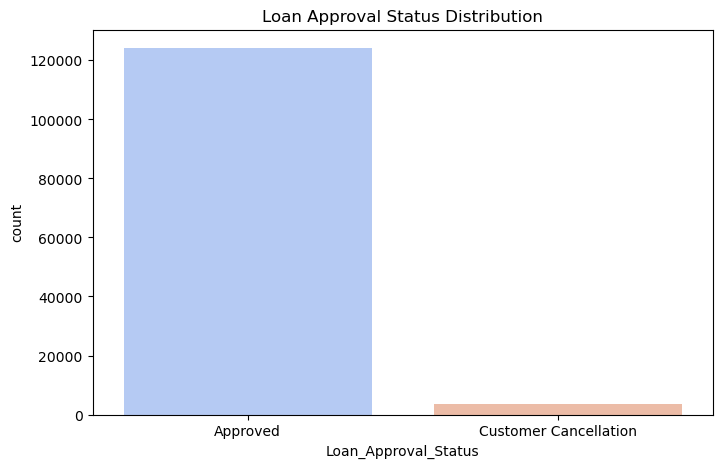

In [34]:
# Distribution of Loan Approval Status
plt.figure(figsize=(8, 5))
sns.countplot(data=final_merged_df_100k, x="Loan_Approval_Status", palette="coolwarm")
plt.title("Loan Approval Status Distribution")
plt.show()

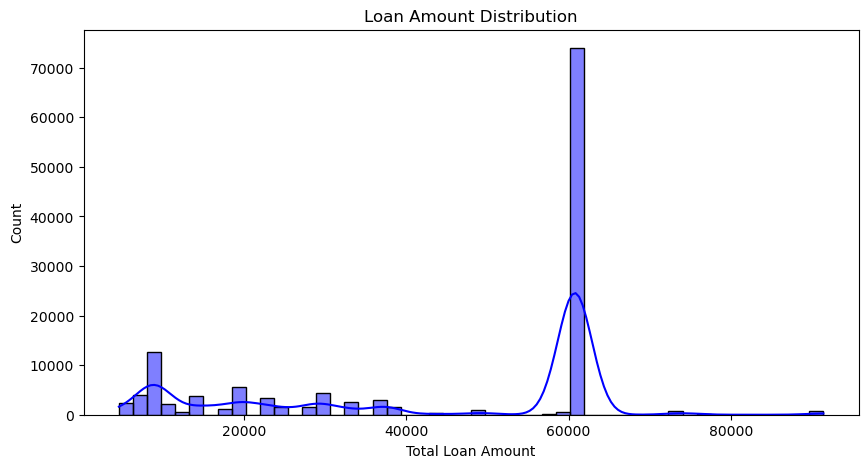

In [35]:
# Visualizing Loan Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(final_merged_df_100k['Total_Loan_Amount'], bins=50, kde=True, color='blue')
plt.title("Loan Amount Distribution")
plt.xlabel("Total Loan Amount")
plt.ylabel("Count")
plt.show()

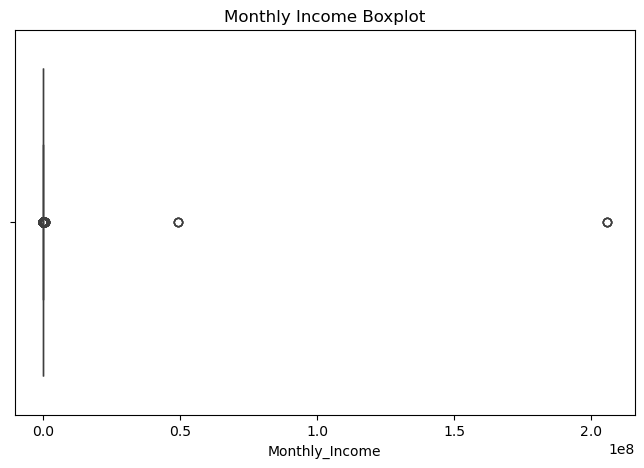

In [36]:
# Boxplot for Monthly Income
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Monthly_Income"])
plt.title("Monthly Income Boxplot")
plt.show()

In [37]:
# Convert date columns to datetime format
date_columns = ["Application_Date", "Contract_Start_Date", "Expected_Contract_End_Date", "Actual_Contract_End_Date"]
for col in date_columns:
    if col in df.columns:
        final_merged_df_100k[col] = pd.to_datetime(final_merged_df_100k[col], errors='coerce')

In [38]:
# Display updated data types
print(final_merged_df_100k.dtypes)

Application_ID                                     object
Key                                                 int64
Loan_Type                                          object
Contract_Start_Date                        datetime64[ns]
Expected_Contract_End_Date                 datetime64[ns]
Actual_Contract_End_Date                   datetime64[ns]
Loan_Term                                          object
Total_Loan_Amount                                 float64
Snapshot Date                                      object
Outstanding Amount                                float64
Due Amount                                        float64
Number of Days Past Due                           float64
Contract Status                                    object
Application_Date_x                                 object
Loan_Approval_Status                               object
Age_at_Application                                float64
Marital_Status                                     object
Gender        

### Compute Correlation with Loan Default

In [39]:
#convert loan default status into a float
final_merged_df_100k["Loan_Default_Encoded"] = final_merged_df_100k["Loan_Default_Status"].map({"Default": 1, "Non-Default": 0}).astype(float)
print(final_merged_df_100k.columns)

Index(['Application_ID', 'Key', 'Loan_Type', 'Contract_Start_Date',
       'Expected_Contract_End_Date', 'Actual_Contract_End_Date', 'Loan_Term',
       'Total_Loan_Amount', 'Snapshot Date', 'Outstanding Amount',
       'Due Amount', 'Number of Days Past Due', 'Contract Status',
       'Application_Date_x', 'Loan_Approval_Status', 'Age_at_Application',
       'Marital_Status', 'Gender', 'Own_Rent_Home',
       'Occupation_Professional_Category',
       'Type_of_Business_Industry_of_Employment', 'Employment_Status',
       'Time_at_Current_Employment_(Months)', 'Number_of_Dependents',
       'Loan_Purpose', 'Monthly_Income', 'Government_Employee',
       'Application_Date_y', 'CRB Score', 'CRB Grade', 'ID', 'Account_Number',
       'Month (YYYY-MM)', 'Open Date', 'Average Balance', 'Overdraft Limit',
       'Number of Days in Debit during Month',
       'Number of Days in Credit during Month', 'Maximum End of Day Balance',
       'Minimum End of Day Balance', 'Sum of Monthly Debit Trans

In [40]:
final_merged_df_100k["Loan_Default_Encoded"]


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
127903    0.0
127904    0.0
127905    0.0
127906    0.0
127907    0.0
Name: Loan_Default_Encoded, Length: 127908, dtype: float64

In [41]:
print("Loan_Default_Encoded" in final_merged_df_100k.columns)
final_merged_df_100k["loan_default_encoded"]

True


KeyError: 'loan_default_encoded'

In [42]:
# Select only numeric columns for correlation
numeric_df = final_merged_df_100k.select_dtypes(include=[np.number])

# Compute correlation of numeric features
correlation_matrix = numeric_df.corr()

# Extract correlation of numerical features with Loan Default
loan_default_corr = correlation_matrix.get("Loan_Default_Encoded", None)

if loan_default_corr is not None:
    loan_default_corr = loan_default_corr.drop("Loan_Default_Encoded").sort_values(ascending=False)
    print("Top Features Correlated with Loan Default:\n", loan_default_corr)
else:
    print("Loan_Default_Encoded column not found in correlation matrix.")

Top Features Correlated with Loan Default:
 Number of Days Past Due                   0.822935
Due Amount                                0.480479
Age_at_Application                        0.059462
ID                                        0.036438
CRB Score                                 0.026037
Number of Cheque Debit Transactions      -0.005052
Number of Days in Debit during Month     -0.008585
Number of Days in Credit during Month    -0.009340
Number of ATM Deposits                   -0.018963
Minimum End of Day Balance               -0.019138
Number of Over the Counter withdrawals   -0.020240
Average Balance                          -0.020579
Number of Debit Card POS Transactions    -0.020651
Number of ATM Withdrawals                -0.020730
Sum of Monthly Debit Transactions        -0.021274
Sum of Monthly Credit Transactions       -0.021330
Maximum End of Day Balance               -0.022107
Number_of_Dependents                     -0.045737
Number of Joint Holders               

In [62]:
final_merged_df_100k.columns = final_merged_df_100k.columns.str.lower()

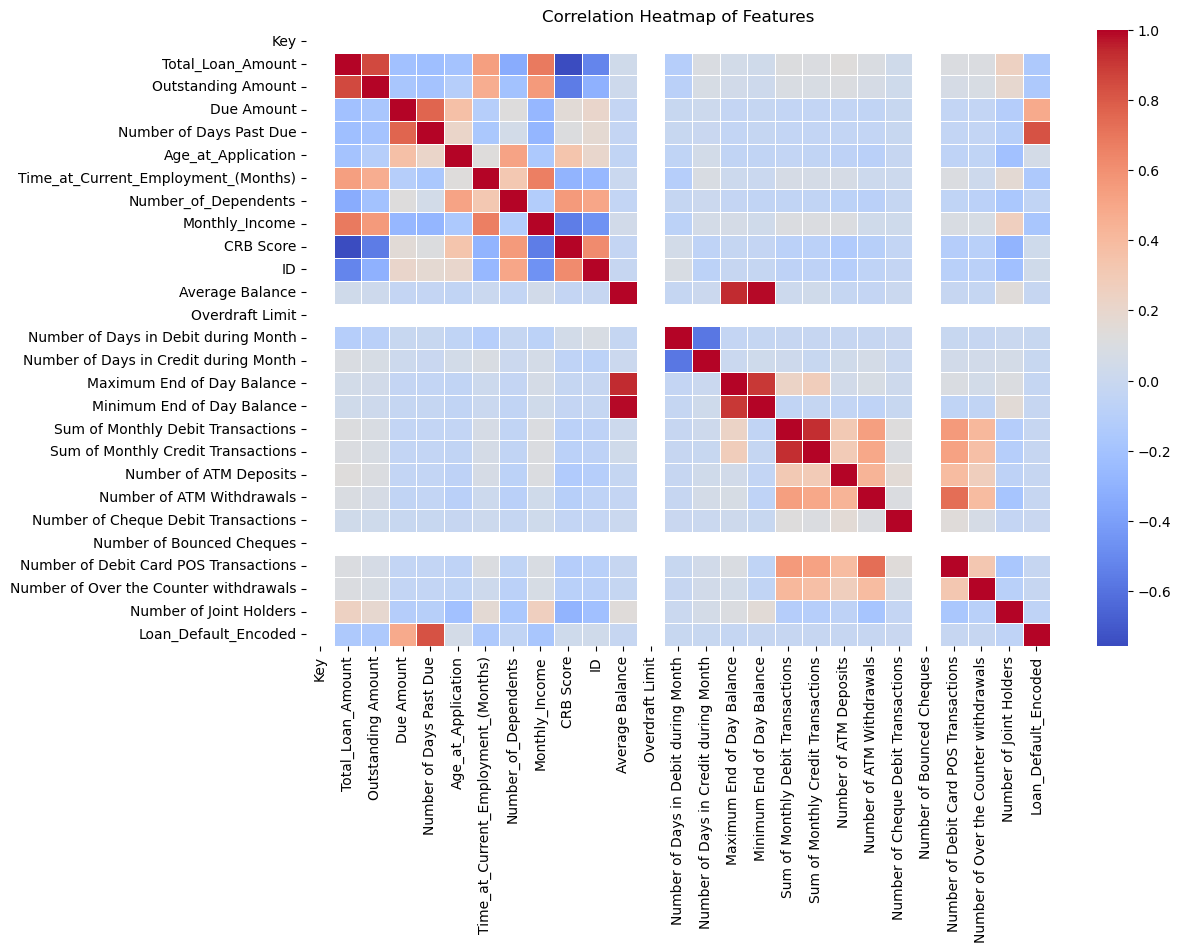

In [43]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Features")

# Show plot
plt.show()

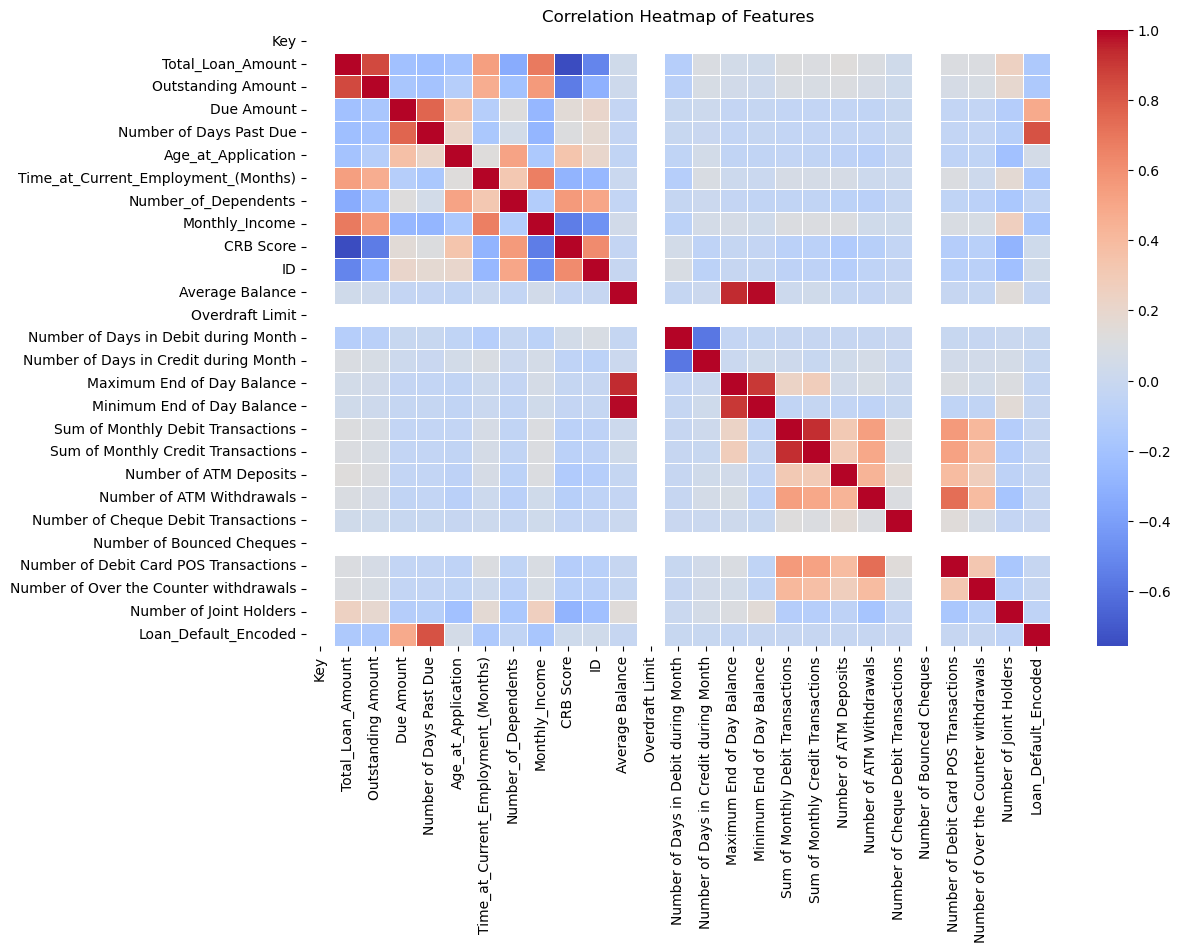

C:\Users\Carol\AppData\Local\Temp\ipykernel_8092\1880709868.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_default_corr.values, y=loan_default_corr.index, palette="coolwarm")


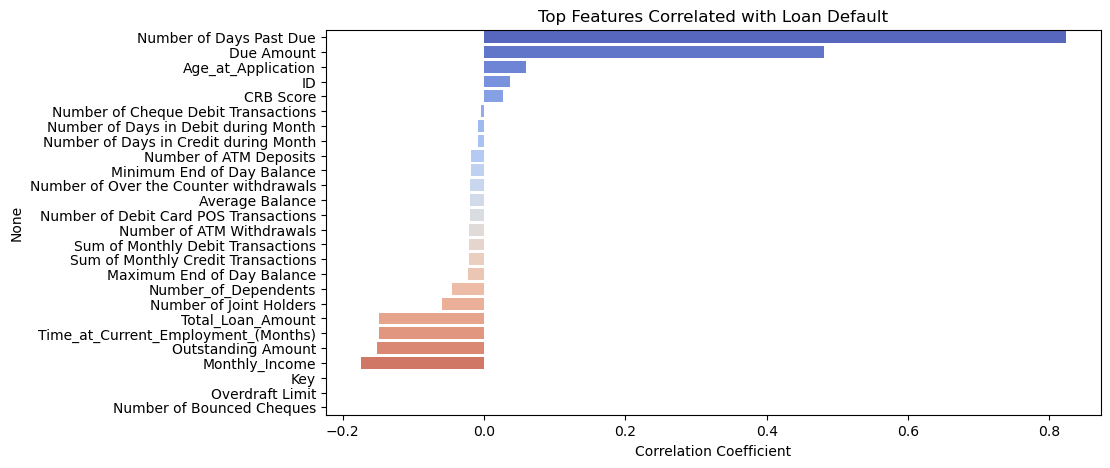

In [44]:
# Plot heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Barplot of top correlated features with Loan Default
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_default_corr.values, y=loan_default_corr.index, palette="coolwarm")
plt.title("Top Features Correlated with Loan Default")
plt.xlabel("Correlation Coefficient")
plt.show()

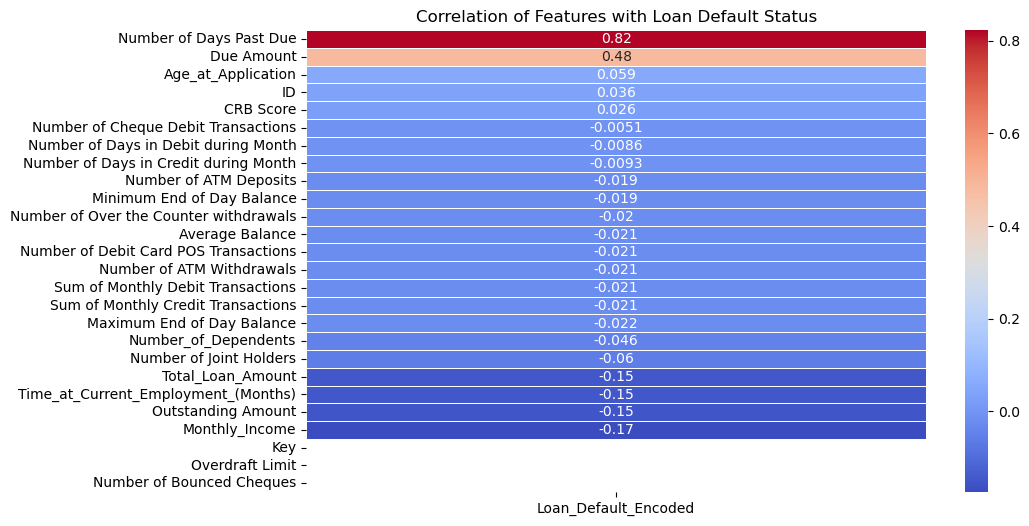

In [45]:
# Extract correlation with Loan Default (if it exists)
if "Loan_Default_Encoded" in correlation_matrix.columns:
    loan_default_corr = correlation_matrix["Loan_Default_Encoded"].drop("Loan_Default_Encoded").sort_values(ascending=False)

    # Plot heatmap for top correlated features
    plt.figure(figsize=(10, 6))
    sns.heatmap(loan_default_corr.to_frame(), cmap="coolwarm", annot=True, linewidths=0.5)
    plt.title("Correlation of Features with Loan Default Status")
    plt.show()
else:
    print("Loan_Default_Encoded column not found in correlation matrix.")

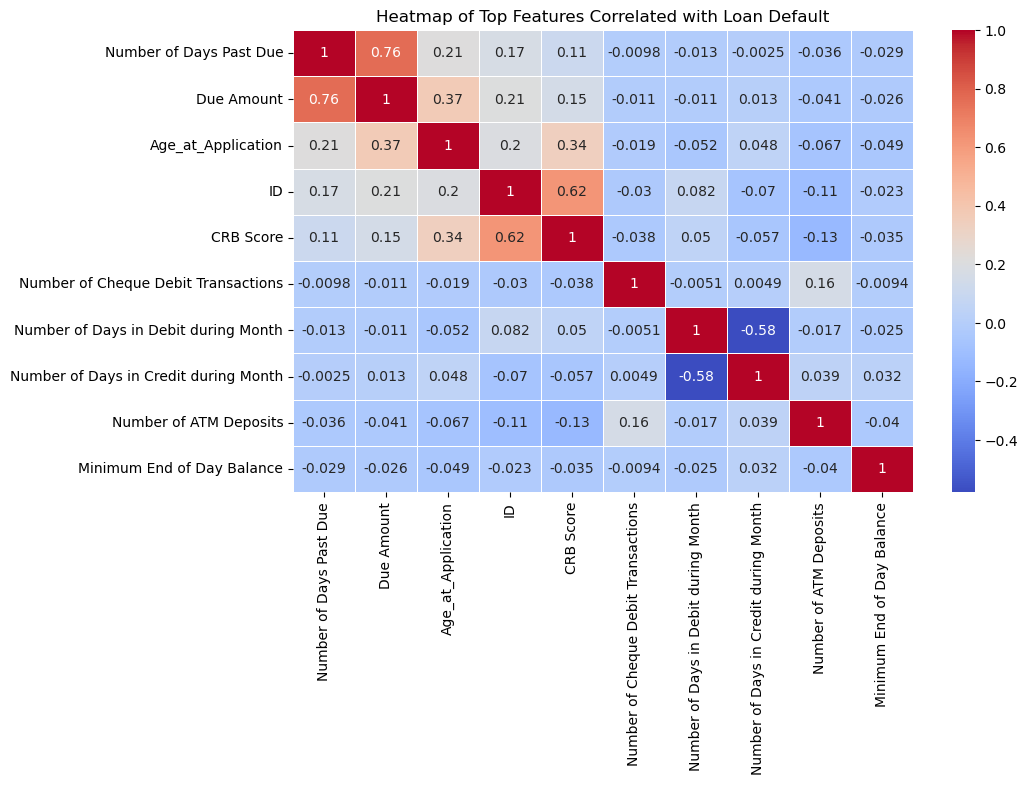

In [46]:
#Plot Focused Heatmap for Key Features

# Select the top features most correlated with Loan Default
top_features = loan_default_corr.index[:10]  # Select top 10 correlated features

# Create heatmap for top correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.loc[top_features, top_features], cmap="coolwarm", annot=True, linewidths=0.5)

plt.title("Heatmap of Top Features Correlated with Loan Default")
plt.show()

In [47]:
Loan_Default_Encoded'

SyntaxError: unterminated string literal (detected at line 1) (536451880.py, line 1)

In [48]:
cat_cols = final_merged_df_100k.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['Application_ID', 'Loan_Type', 'Loan_Term', 'Snapshot Date', 'Contract Status', 'Application_Date_x', 'Loan_Approval_Status', 'Marital_Status', 'Gender', 'Own_Rent_Home', 'Occupation_Professional_Category', 'Type_of_Business_Industry_of_Employment', 'Employment_Status', 'Loan_Purpose', 'Application_Date_y', 'CRB Grade', 'Account_Number', 'Month (YYYY-MM)', 'Open Date', 'Last Transaction Date', 'Account Type', 'Account Status', 'SpshotMonth', 'Loan_Default_Status']


<Figure size 1200x800 with 0 Axes>

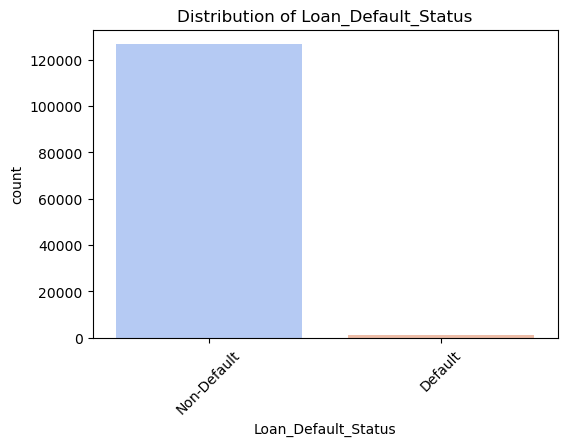

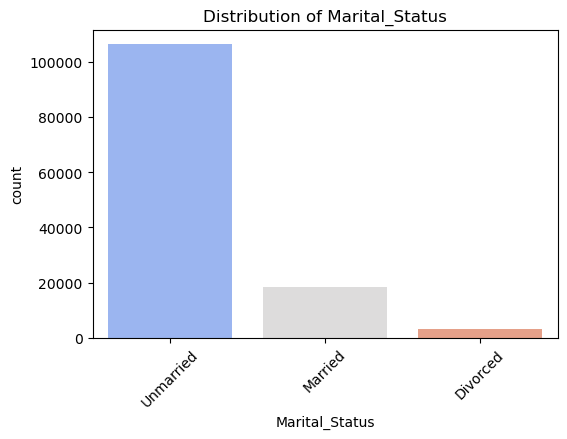

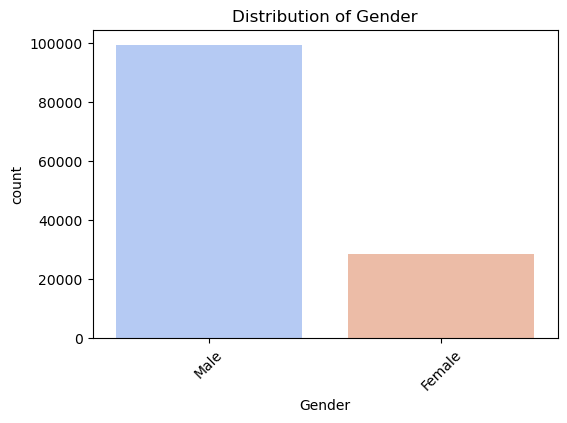

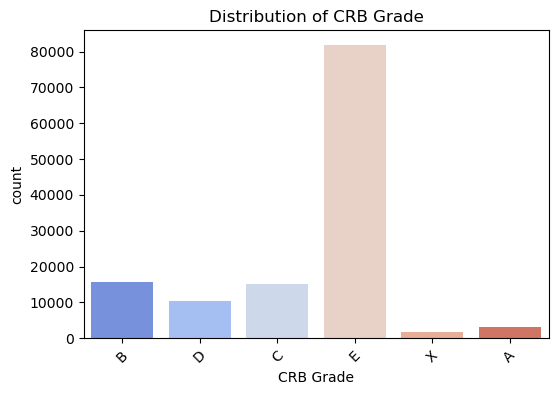

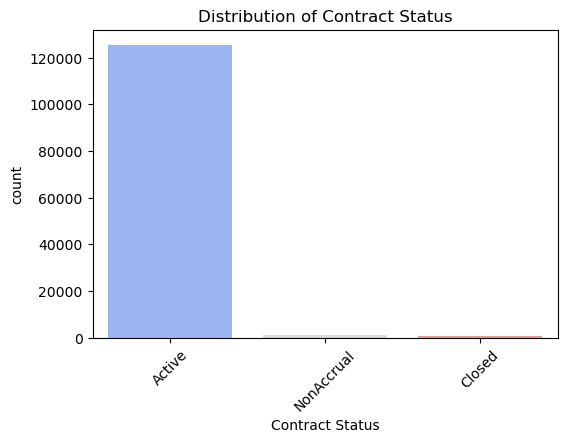

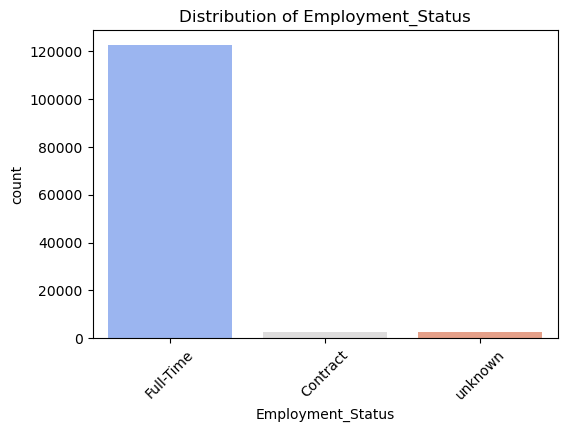

In [49]:
# Select key categorical features

# Define categorical columns
categorical_columns = ["Loan_Default_Status", "Marital_Status", "Gender","CRB Grade","Contract Status", "Employment_Status"]

# Set plot size
plt.figure(figsize=(12, 8))

# Iterate through categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=final_merged_df_100k[col], hue=final_merged_df_100k[col], palette="coolwarm", legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [50]:
#Importing linear_modelibraries for modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [ ]:
numeric_df

In [78]:
# Convert Categorical Columns to Numeric
cat_cols = final_merged_df_100k.select_dtypes(include=['object']).columns
for col in cat_cols:
    final_merged_df_100k[col] = LabelEncoder().fit_transform(final_merged_df_100k[col])  # Encode categorical values

In [54]:
final_merged_df_100k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127908 entries, 0 to 127907
Data columns (total 55 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Application_ID                           127908 non-null  int32         
 1   Key                                      127908 non-null  int64         
 2   Loan_Type                                127908 non-null  int32         
 3   Contract_Start_Date                      127908 non-null  datetime64[ns]
 4   Expected_Contract_End_Date               127908 non-null  datetime64[ns]
 5   Actual_Contract_End_Date                 127908 non-null  datetime64[ns]
 6   Loan_Term                                127908 non-null  int32         
 7   Total_Loan_Amount                        127908 non-null  float64       
 8   Snapshot Date                            127908 non-null  int32         
 9   Outstanding Amount        

In [79]:
# Selecting Features 
final_merged_df_100k=df

X = df.drop(columns=["Number of Days Past Due"])  # Independent variables
y = df["Number of Days Past Due"]  # Target variable

In [80]:
#Train the test data 
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
 #Feature Scaling
scaler = StandardScaler()
scaler.fit_transform(X_train,X_test)


array([[ 0.35391076,  0.37192209,         nan, ...,         nan,
         0.08968401,         nan],
       [ 0.35391076,  0.37192209,         nan, ...,         nan,
         0.08968401,         nan],
       [ 0.35391076,  0.37192209,         nan, ...,         nan,
         0.08968401,         nan],
       ...,
       [-0.27435866,  0.37192209,  2.56558159, ...,         nan,
         0.08968401,         nan],
       [ 0.35391076,  0.37192209,         nan, ...,         nan,
         0.08968401,         nan],
       [-0.59385403,  0.37192209,  1.03646544, ...,         nan,
         0.08968401,         nan]])

In [85]:
#Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [83]:
# for name, model in models.items():
#     model.fit(X_train, y_train)  # Train model
#     y_pred = model.predict(X_test)  # Make predictions
#     accuracy = accuracy_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_pred)

In [87]:
#fit the model 
#Logistic Regression.fit(X_train, y_train) 

In [88]:
#make predictions 
#y_pred = model.predict(X_test) 

In [ ]:
# accuracy_log_reg = accuracy_score(y_test, y_pred)
# accuracy_log_reg

In [ ]:
# Boxplot of Monthly Income vs. Loan Approval Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_merged_df_100k, x="Loan_Approval_Status", y="Monthly_Income", palette="muted")
plt.yscale("log")  # Log scale to handle skewness
plt.title("Monthly Income vs. Loan Approval Status")
plt.show()

# Pairplot for important numeric variables
sns.pairplot(df[['Total_Loan_Amount', 'Monthly_Income', 'Loan_Term']])
plt.show()

In [ ]:
# Convert Categorical Columns to Numeric
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])  # Encode categorical values